<a href="https://colab.research.google.com/github/Maryam-71295/Stock-Price-Prediction-Task3-EcodeCamp_Internship/blob/main/Task_2_Stock_price_Prediction_EcodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

# Enable offline plotting in Jupyter Notebooks
init_notebook_mode(connected=True)

In [39]:
IBM=pd.read_csv('/content/weekly_adjusted_IBM.csv')

In [40]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        770 non-null    object 
 1   open             770 non-null    float64
 2   high             770 non-null    float64
 3   low              770 non-null    float64
 4   close            770 non-null    float64
 5   adjusted close   770 non-null    float64
 6   volume           770 non-null    float64
 7   dividend amount  770 non-null    float64
dtypes: float64(7), object(1)
memory usage: 81.4+ KB


In [41]:
IBM['timestamp'] = pd.to_datetime(IBM['timestamp'])

In [42]:
print(IBM.columns)

Index(['timestamp', 'open', 'high', 'low', 'close', 'adjusted close', 'volume',
       'dividend amount'],
      dtype='object')


In [43]:
print(f'Dataframe contains stock prices between {IBM["timestamp"].min()} and {IBM["timestamp"].max()}')
print(f'Total days = {(IBM["timestamp"].max() - IBM["timestamp"].min()).days} days')

Dataframe contains stock prices between 2010-01-08 00:00:00 and 2024-10-03 00:00:00
Total days = 5382 days


In [44]:
IBM.describe()

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
count,770,770.00000,770.000000,770.000000,770.000000,770.000000,7.700000e+02,770.000000
mean,2017-05-22 11:13:14.805194752,155.09875,158.210272,152.147772,155.255935,110.702418,2.298165e+07,0.099961
min,2010-01-08 00:00:00,94.60000,107.410000,90.560000,95.390000,69.535200,7.770697e+06,0.000000
25%,2013-09-14 18:00:00,134.29250,137.102500,131.910000,134.412500,99.185300,1.654616e+07,0.000000
50%,2017-05-22 12:00:00,148.48000,152.590000,146.400000,148.995000,107.720450,2.088140e+07,0.000000
75%,2021-01-27 06:00:00,174.97500,179.075000,172.705025,175.970000,117.901550,2.630679e+07,0.000000
max,2024-10-03 00:00:00,220.65000,224.150000,217.270000,222.720000,222.720000,8.777343e+07,1.670000
std,NaN,25.60982,25.695047,25.554405,25.734637,22.731402,9.433309e+06,0.361908


<Axes: >

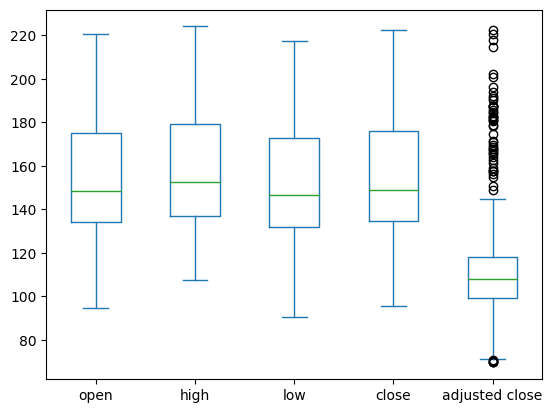

In [45]:
IBM[['open', 'high', 'low', 'close', 'adjusted close']].plot(kind='box')

In [46]:
# Define the layout for the plot
layout = go.Layout(
    title='Stock Prices of IBM',
    titlefont=dict(
        family='Arial, sans-serif',  # Specify the font family
        size=18,                     # Font size
        color='black'                # Font color
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='#7f7f7f'
        ),
        tickformat='%Y-%m-%d'

        # Formatting the date display
    ),
    yaxis=dict(
        title='Price (USD)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='#7f7f7f'
        )
    ),
)


In [47]:

# Make sure the 'timestamp' column is in datetime format
IBM['timestamp'] = pd.to_datetime(IBM['timestamp'])

# Create the plot data
IBM_date = [go.Scatter(x=IBM['timestamp'], y=IBM['close'], mode='lines', name='IBM Close Price')]


In [48]:
# Import necessary libraries
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd

# Initialize Plotly for offline plotting
init_notebook_mode(connected=True)

In [49]:
IBM_trace = go.Scatter(
    x=IBM['timestamp'],  # x-axis: dates (use the correct column name here)
    y=IBM['close'],  # y-axis: closing prices (use the correct column name here)
    mode='lines',             # Line chart
    name='IBM Close Price',   # Name of the data
    line=dict(color='blue')   # Line color
)



In [50]:
# Define the layout for the plot
layout = go.Layout(
    title='IBM Stock Prices',
    titlefont=dict(
        family='Courier New, monospace',  # Specify the font family
        size=18,                     # Font size
        color='#7f7f7f'                # Font color
    ),
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        ),
        tickformat='%Y-%m-%d'  # Formatting the date display
    ),
    yaxis=dict(
        title='Price (USD)',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
IBM_data=[{'x': IBM['timestamp'], 'Y':IBM['close']}]
plot = go.Figure(data=[IBM_trace], layout=layout)

In [51]:
# Display the plot
iplot(plot)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
#Split the data into train and test sets
X = np.array(IBM.index).reshape(-1,1)
Y = IBM['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=101)

In [54]:
scaler= StandardScaler().fit(X_train)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
print(Y_train.isnull().sum())

385


In [57]:
X_train = X_train[~Y_train.isna()]
Y_train = Y_train.dropna()

In [58]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.
Y_train = imputer.fit_transform(Y_train.values.reshape(-1, 1))

In [59]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [60]:
# Plot actual values (scatter plot)
trace0 = go.Scatter(
    x = X_train.T[0],  # corrected 'X' to 'x' and added a comma
    y = Y_train,
    mode = 'markers',
    name = 'Actual'  # corrected 'Name' to 'name'
)

# Plot predicted values (line plot)
trace1 = go.Scatter(
    x = X_train.T[0],  # corrected 'X' to 'x' and added a comma
    y = lm.predict(X_train),  # Use the model's predictions
    mode = 'lines',
    name = 'Predicted'  # corrected 'Name' to 'name'
)

# Combine both traces
IBM_data = [trace0, trace1]

# Create the layout
layout = go.Layout(
    title='Actual vs Predicted Values',
    xaxis=dict(title='Day'),  # corrected axis title
    yaxis=dict(title='Price')
)

# Plot the figure
plot2 = go.Figure(data=IBM_data, layout=layout)
plot2.show()

In [61]:
print(np.isnan(X_test).sum())  # Count of NaN values in X_test
print(np.isnan(Y_test).sum())  # Count of NaN values in Y_test

0
145


In [62]:
import numpy as np

# Remove rows with NaN in either X_test or Y_test
mask = ~np.isnan(X_test).any(axis=1) & ~np.isnan(Y_test)

X_test_clean = X_test[mask]
Y_test_clean = Y_test[mask]


In [63]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_test = imputer.fit_transform(X_test)
Y_test = imputer.transform(Y_test.values.reshape(-1, 1))

In [64]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the scores for train and test datasets
train_r2 = r2_score(Y_train, lm.predict(X_train))
test_r2 = r2_score(Y_test, lm.predict(X_test))
train_mse = mean_squared_error(Y_train, lm.predict(X_train))
test_mse = mean_squared_error(Y_test, lm.predict(X_test))

# Format and display the scores
Scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'R2 Score'.ljust(10)}{str(train_r2).center(20)}{str(test_r2).center(20)}
{'MSE'.ljust(10)}{str(train_mse).center(20)}{str(test_mse).center(20)}
'''

print(Scores)


Metric           Train                Test        
R2 Score  0.18687876745441168 -0.3657663633278867 
MSE        528.5642505841016    68492.2268611716  



In [65]:
# Convert 'Date' column to datetime and set as index
IBM['timestamp'] = pd.to_datetime(IBM['timestamp'])
IBM.set_index('timestamp', inplace=True)

In [66]:
Data = IBM[['close']]

In [67]:
# Preprocessing: Scale the data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Data)

In [68]:
# Create training and test sets (80% training, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [69]:
# Function to create the dataset for LSTM model (with look_back window)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [70]:
# Hyperparameter: Look-back window
look_back = 60

In [71]:
# Create train and test datasets
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [72]:
# Reshape data for LSTM model (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [73]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: nan
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: nan
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: nan
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: nan
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: nan
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: nan
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: nan
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: nan


In [76]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [77]:
# Inverse transform the scaled data back to original values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, r2_score


In [79]:
df = pd.read_csv('/content/weekly_adjusted_IBM.csv')

In [80]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [81]:
df.set_index('timestamp', inplace=True)

In [82]:
data = df[['close']]

In [83]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [84]:
# Create the training dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [85]:
# Function to create X and Y for LSTM
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i - look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)
look_back = 60  # Try experimenting with other values like 30, 100
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [86]:
# Reshape X to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [87]:
# Build the LSTM model with Dropout to avoid overfitting
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Another Dropout layer
model.add(Dense(units=25))  # Dense layer
model.add(Dense(units=1))  # Output layer for prediction


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [88]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [89]:
# Train the model
history = model.fit(X_train, Y_train, epochs=15, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: nan - val_loss: nan
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: nan - val_loss: nan
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: nan - val_loss: nan
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: nan - val_loss: nan
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: nan - val_loss: nan
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: nan - val_loss: nan
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: nan - val_loss: nan
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: nan - val_loss: nan
Epoch 9/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: nan - val_loss: nan
Epoch 10/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: nan - val_loss: nan
Epoch 11/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: nan - val_loss: nan
Epoch 12/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: nan - val_loss: nan
Epoch 13/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/st

In [90]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [91]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [92]:
# Inverse scale Y_train and Y_test
Y_train = scaler.inverse_transform([Y_train])
Y_test = scaler.inverse_transform([Y_test])

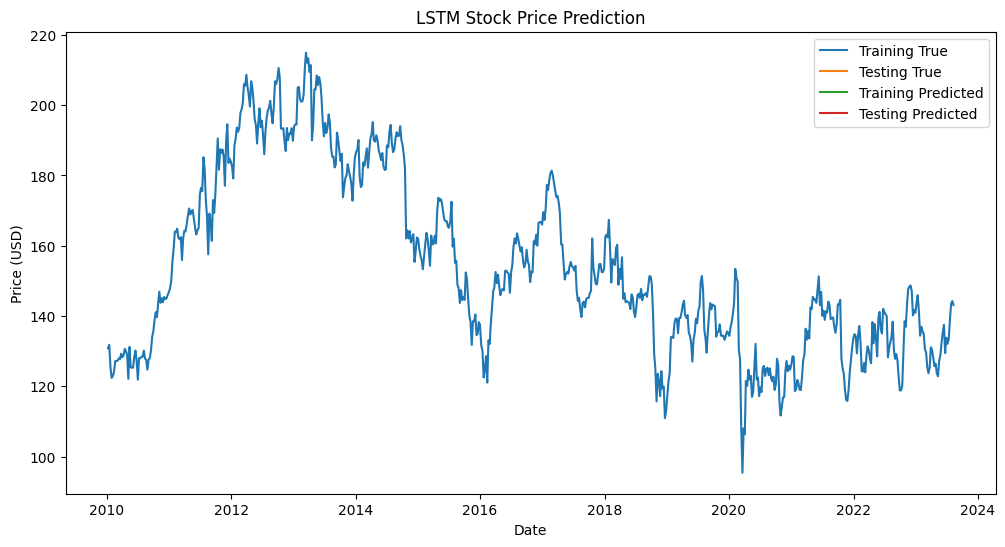

In [93]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[look_back:train_size], Y_train.flatten(), label='Training True')
plt.plot(df.index[train_size + look_back:], Y_test.flatten(), label='Testing True')
plt.plot(df.index[look_back:train_size], train_predict.flatten(), label='Training Predicted')
plt.plot(df.index[train_size + look_back:], test_predict.flatten(), label='Testing Predicted')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [94]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Check for NaN values in Y_test and test_predict
print("Checking for NaN values:")
print(f"NaNs in Y_test: {np.isnan(Y_test).sum()}")
print(f"NaNs in test_predict: {np.isnan(test_predict).sum()}")

# Remove NaN values separately for Y_test and test_predict
Y_test_clean = Y_test[~np.isnan(Y_test)]        # Remove NaNs in Y_test
test_predict_clean = test_predict[~np.isnan(test_predict)]  # Remove NaNs in test_predict

# Ensure that both arrays have the same length after cleaning
min_len = min(len(Y_test_clean), len(test_predict_clean))

if min_len == 0:
    print("No valid data available for evaluation after cleaning. Please check your data.")
else:
    Y_test_clean = Y_test_clean[:min_len]          # Truncate to same length
    test_predict_clean = test_predict_clean[:min_len]

    # Now evaluate the model
    mse = mean_squared_error(Y_test_clean.flatten(), test_predict_clean.flatten())
    r2 = r2_score(Y_test_clean.flatten(), test_predict_clean.flatten())

    # Print the results
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


Checking for NaN values:
NaNs in Y_test: 200
NaNs in test_predict: 200
No valid data available for evaluation after cleaning. Please check your data.


In [95]:
# Plot the results with years on the x-axis and Close Price on the y-axis
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

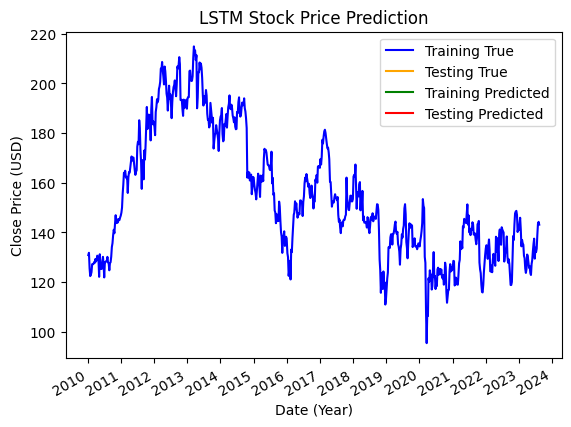

In [96]:
# Plotting the training data
plt.plot(df.index[look_back:train_size], Y_train.flatten(), label='Training True', color='blue')
plt.plot(df.index[train_size + look_back:], Y_test.flatten(), label='Testing True', color='orange')

# Plotting the predicted data
plt.plot(df.index[look_back:train_size], train_predict.flatten(), label='Training Predicted', color='green')
plt.plot(df.index[train_size + look_back:], test_predict.flatten(), label='Testing Predicted', color='red')

# Formatting the date on the x-axis to show years
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format the x-axis to display the year

# Adding labels and title
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date (Year)')
plt.ylabel('Close Price (USD)')
plt.legend()

# Rotating the x-axis dates for better readability
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

In [97]:
import numpy as np
import pandas as pd
from flask import Flask, render_template, request
from sklearn.linear_model import LinearRegression
import joblib

# Create a Flask app
app = Flask(__name__)

# Sample data for demonstration purposes
np.random.seed(42)
X_train = np.random.rand(100, 1) * 10  # Random X values (e.g., days)
Y_train = 2 * X_train.flatten() + np.random.normal(0, 2, 100)  # Linear relation with noise

# Train the model (In a real application, load a pre-trained model instead)
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Save the model
joblib.dump(lm, 'stock_model.pkl')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input
    day = float(request.form['day'])

    # Load the model
    model = joblib.load('stock_model.pkl')

    # Make prediction
    prediction = model.predict(np.array([[day]]))[0]

    return render_template('index.html', prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [101]:
import os

# Create 'templates' folder and write the HTML file
if not os.path.exists('templates'):
    os.makedirs('templates')

In [102]:
# Write HTML to file
with open('templates/index.html', 'w') as f:
    f.write('''<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Stock Price Predictor</title>
</head>
<body>
    <h2>Enter Day for Stock Price Prediction</h2>
    <form action="/predict" method="POST">
        <label for="day">Day:</label>
        <input type="number" step="0.1" id="day" name="day" required><br>

        <input type="submit" value="Predict">
    </form>

    <h2>{{ prediction_text }}</h2>
</body>
</html>''')

In [104]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html', prediction_text='')

@app.route('/predict', methods=['POST'])
def predict():
    # Get user input
    day = float(request.form['day'])

    # Load the model
    model = joblib.load('stock_model.pkl')

    # Make prediction
    prediction = model.predict(np.array([[day]]))[0]

    # Prepare prediction text for rendering
    prediction_text = f'Predicted Stock Price for Day {day}: ${prediction:.2f}'

    return render_template('index.html', prediction_text=prediction_text)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [105]:
pip install Flask numpy scikit-learn joblib

In [106]:
from sklearn.linear_model import LinearRegression
import numpy as np
import joblib

# Dummy data for training (replace this with your actual data)
X_train = np.array([[1], [2], [3], [4], [5]])
Y_train = np.array([100, 200, 300, 400, 500])

# Train the model
model = LinearRegression()
model.fit(X_train, Y_train)

# Save the trained model
joblib.dump(model, 'stock_model.pkl')

['stock_model.pkl']

In [111]:
pip freeze > requirements.txt